In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [41]:
df = pd.read_csv('WELFake_Dataset.csv')
df

Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                NaN   
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
0      No comment is expected from Barack Obama Membe...      1  
1         Did they post their votes for Hillary already?      1  
2       Now, most of the demonstrators gathered last ...      1  
3      A dozen politically active pastors came here f...      0  
4      The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
...                                                  ...    ...  
72129  WASHINGTON (Reuters) - Hackers believed to be ...      0  
72130  You know, because in fantasyland Republicans n...      1  
72131  Migrants Refuse To Leave Train At Refugee Camp...      0  
72132  MEXICO CITY (Reuters) - Donald Trump’s combati...      0  
72133  Goldman Sachs Endorses Hillary Clinton For Pre...      1  

[72134 rows x 4 columns]

In [42]:
df.describe()

Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    18033.250000      0.000000
50%    36066.500000      1.000000
75%    54099.750000      1.000000
max    72133.000000      1.000000

In [43]:
df.shape



(72134, 4)

In [44]:
df['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

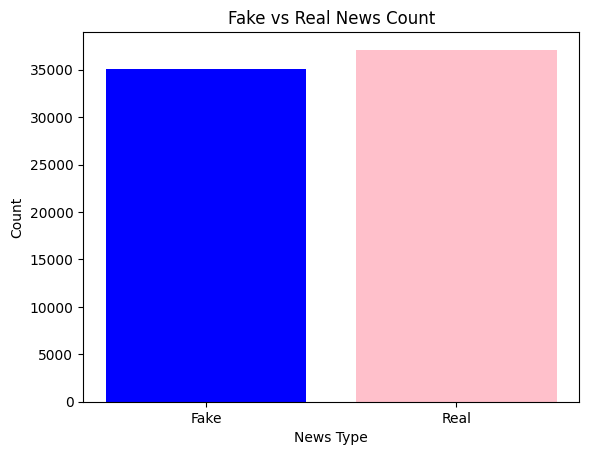

In [45]:
fake_count = df[df['label'] == 0].shape[0]
real_count = df[df['label'] == 1].shape[0]
labels = ['Fake', 'Real']
counts = [fake_count, real_count]

plt.bar(labels, counts, color=['blue', 'pink'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.title('Fake vs Real News Count')
plt.show()

In [46]:
df.describe()

Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    18033.250000      0.000000
50%    36066.500000      1.000000
75%    54099.750000      1.000000
max    72133.000000      1.000000

In [47]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

<Axes: >

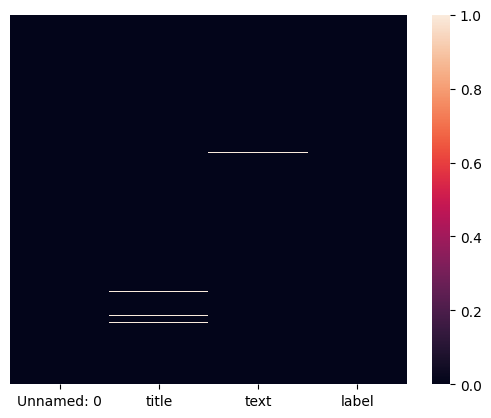

In [48]:
sns.heatmap(df.isnull(),yticklabels = False)

In [49]:
df=df.fillna(' ')

In [50]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [51]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [52]:
df.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [53]:
df["training_feature"] = df["title"] + df["text"]
df.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                    training_feature  
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...  
1     Did they post their votes for Hillary already?  
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...  
3  Bobby Jindal, raised Hindu, uses story of Chri...  
4  SATAN 2: Russia unvelis an image of its terrif...

In [54]:
df=df[['training_feature','label']]
df

training_feature  label
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...      1
1         Did they post their votes for Hillary already?      1
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...      1
3      Bobby Jindal, raised Hindu, uses story of Chri...      0
4      SATAN 2: Russia unvelis an image of its terrif...      1
...                                                  ...    ...
72129  Russians steal research on Trump in hack of U....      0
72130   WATCH: Giuliani Demands That Democrats Apolog...      1
72131  Migrants Refuse To Leave Train At Refugee Camp...      0
72132  Trump tussle gives unpopular Mexican leader mu...      0
72133  Goldman Sachs Endorses Hillary Clinton For Pre...      1

[72134 rows x 2 columns]

In [55]:
dfFake = df[df['label'] == 0]
dfFake

training_feature  label
3      Bobby Jindal, raised Hindu, uses story of Chri...      0
11     May Brexit offer would hurt, cost EU citizens ...      0
12     Schumer calls on Trump to appoint official to ...      0
14     No Change Expected for ESPN Political Agenda D...      0
15     Billionaire Odebrecht in Brazil scandal releas...      0
...                                                  ...    ...
72124  An Unlikely Contender Rises in France as the A...      0
72126  Determined to kill: Can tough gun laws end mas...      0
72129  Russians steal research on Trump in hack of U....      0
72131  Migrants Refuse To Leave Train At Refugee Camp...      0
72132  Trump tussle gives unpopular Mexican leader mu...      0

[35028 rows x 2 columns]

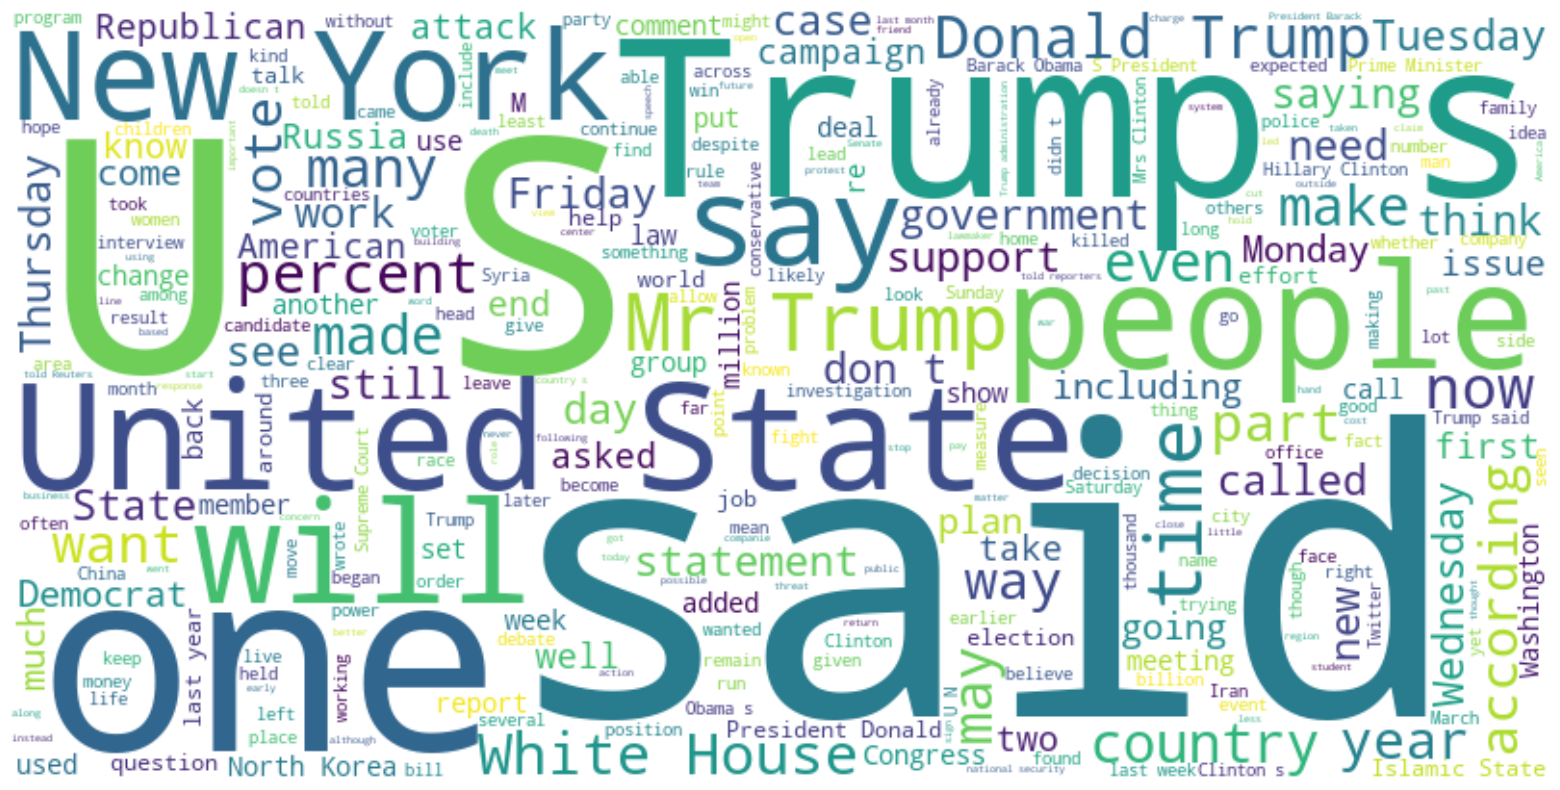

In [56]:

from wordcloud import WordCloud
FakeCon = ' '.join(con for con in dfFake['training_feature'])
wordcloud = WordCloud(background_color='white', 
    max_words=300,
    width=800, 
    height=400,).generate(FakeCon)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
dfTrue = df[df['label'] == 1]
dfTrue

training_feature  label
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...      1
1         Did they post their votes for Hillary already?      1
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...      1
4      SATAN 2: Russia unvelis an image of its terrif...      1
5      About Time! Christian Group Sues Amazon and SP...      1
...                                                  ...    ...
72125  WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...      1
72127  WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...      1
72128  JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...      1
72130   WATCH: Giuliani Demands That Democrats Apolog...      1
72133  Goldman Sachs Endorses Hillary Clinton For Pre...      1

[37106 rows x 2 columns]

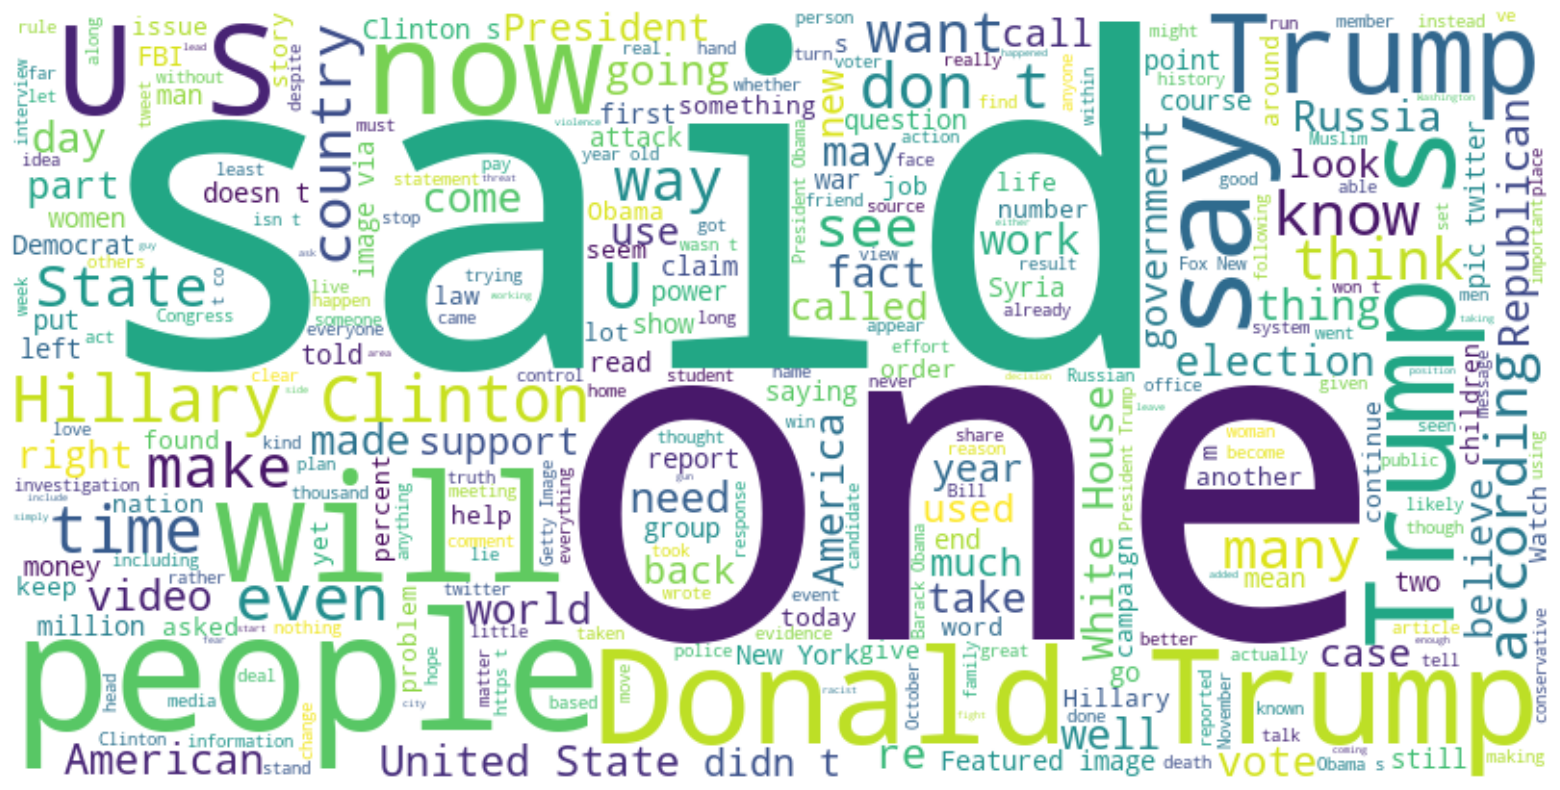

In [58]:
from wordcloud import WordCloud
FakeCon = ' '.join(con for con in dfTrue['training_feature'])
wordcloud = WordCloud(background_color='white', 
    max_words=300,
    width=800, 
    height=400,).generate(FakeCon)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources
nltk.download(['stopwords'])
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
samplet = df['training_feature'].iloc[5]
print(samplet)
wordst = word_tokenize(samplet) 
wordst

About Time! Christian Group Sues Amazon and SPLC for Designation as Hate GroupAll we can say on this one is it s about time someone sued the Southern Poverty Law Center!On Tuesday, D. James Kennedy Ministries (DJKM) filed a lawsuit against the Southern Poverty Law Center (SPLC), the charity navigation organization GuideStar, and Amazon, for defamation, religious discrimination, and trafficking in falsehood. The SPLC listed DJKM as a  hate group,  while GuideStar also categorized it in those terms, and Amazon kept the ministry off of its charity donation program, Amazon Smile. We embarked today on a journey to right a terrible wrong,  Dr. Frank Wright, president and CEO at DJKM, said in a statement Tuesday.  Those who knowingly label Christian ministries as  hate  groups, solely for subscribing to the historic Christian faith, are either woefully uninformed or willfully deceitful. In the case of the Southern Poverty Law Center, our lawsuit alleges the latter. The SPLC has labeled DJKM a

['About',
 'Time',
 '!',
 'Christian',
 'Group',
 'Sues',
 'Amazon',
 'and',
 'SPLC',
 'for',
 'Designation',
 'as',
 'Hate',
 'GroupAll',
 'we',
 'can',
 'say',
 'on',
 'this',
 'one',
 'is',
 'it',
 's',
 'about',
 'time',
 'someone',
 'sued',
 'the',
 'Southern',
 'Poverty',
 'Law',
 'Center',
 '!',
 'On',
 'Tuesday',
 ',',
 'D.',
 'James',
 'Kennedy',
 'Ministries',
 '(',
 'DJKM',
 ')',
 'filed',
 'a',
 'lawsuit',
 'against',
 'the',
 'Southern',
 'Poverty',
 'Law',
 'Center',
 '(',
 'SPLC',
 ')',
 ',',
 'the',
 'charity',
 'navigation',
 'organization',
 'GuideStar',
 ',',
 'and',
 'Amazon',
 ',',
 'for',
 'defamation',
 ',',
 'religious',
 'discrimination',
 ',',
 'and',
 'trafficking',
 'in',
 'falsehood',
 '.',
 'The',
 'SPLC',
 'listed',
 'DJKM',
 'as',
 'a',
 'hate',
 'group',
 ',',
 'while',
 'GuideStar',
 'also',
 'categorized',
 'it',
 'in',
 'those',
 'terms',
 ',',
 'and',
 'Amazon',
 'kept',
 'the',
 'ministry',
 'off',
 'of',
 'its',
 'charity',
 'donation',
 'program'

In [61]:
print("Before stopwords:",wordst)
stop_words = set(stopwords.words('english'))
print(stop_words)
wordss = [word for word in wordst if word not in stop_words]
print("after stopwords",wordss)

Before stopwords: ['About', 'Time', '!', 'Christian', 'Group', 'Sues', 'Amazon', 'and', 'SPLC', 'for', 'Designation', 'as', 'Hate', 'GroupAll', 'we', 'can', 'say', 'on', 'this', 'one', 'is', 'it', 's', 'about', 'time', 'someone', 'sued', 'the', 'Southern', 'Poverty', 'Law', 'Center', '!', 'On', 'Tuesday', ',', 'D.', 'James', 'Kennedy', 'Ministries', '(', 'DJKM', ')', 'filed', 'a', 'lawsuit', 'against', 'the', 'Southern', 'Poverty', 'Law', 'Center', '(', 'SPLC', ')', ',', 'the', 'charity', 'navigation', 'organization', 'GuideStar', ',', 'and', 'Amazon', ',', 'for', 'defamation', ',', 'religious', 'discrimination', ',', 'and', 'trafficking', 'in', 'falsehood', '.', 'The', 'SPLC', 'listed', 'DJKM', 'as', 'a', 'hate', 'group', ',', 'while', 'GuideStar', 'also', 'categorized', 'it', 'in', 'those', 'terms', ',', 'and', 'Amazon', 'kept', 'the', 'ministry', 'off', 'of', 'its', 'charity', 'donation', 'program', ',', 'Amazon', 'Smile', '.', 'We', 'embarked', 'today', 'on', 'a', 'journey', 'to', 

In [62]:
print("before stemming:",wordss)
stemmer = PorterStemmer()
print(stemmer)
wordsst = [stemmer.stem(word) for word in wordss]
print("after stemming",wordsst)

before stemming: ['About', 'Time', '!', 'Christian', 'Group', 'Sues', 'Amazon', 'SPLC', 'Designation', 'Hate', 'GroupAll', 'say', 'one', 'time', 'someone', 'sued', 'Southern', 'Poverty', 'Law', 'Center', '!', 'On', 'Tuesday', ',', 'D.', 'James', 'Kennedy', 'Ministries', '(', 'DJKM', ')', 'filed', 'lawsuit', 'Southern', 'Poverty', 'Law', 'Center', '(', 'SPLC', ')', ',', 'charity', 'navigation', 'organization', 'GuideStar', ',', 'Amazon', ',', 'defamation', ',', 'religious', 'discrimination', ',', 'trafficking', 'falsehood', '.', 'The', 'SPLC', 'listed', 'DJKM', 'hate', 'group', ',', 'GuideStar', 'also', 'categorized', 'terms', ',', 'Amazon', 'kept', 'ministry', 'charity', 'donation', 'program', ',', 'Amazon', 'Smile', '.', 'We', 'embarked', 'today', 'journey', 'right', 'terrible', 'wrong', ',', 'Dr.', 'Frank', 'Wright', ',', 'president', 'CEO', 'DJKM', ',', 'said', 'statement', 'Tuesday', '.', 'Those', 'knowingly', 'label', 'Christian', 'ministries', 'hate', 'groups', ',', 'solely', 'su

In [63]:
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove special characters and numbers
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.lower()
    
    # Tokenization
    words = word_tokenize(text)   
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming (you can use lemmatization instead if preferred)
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    # Join the words back into a string 
    preprocessed_text = ' '.join(words)
    return preprocessed_text
df['preprocessed_text'] = df['training_feature'].apply(preprocess_text)   



In [64]:
df 

training_feature  label  \
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...      1   
1         Did they post their votes for Hillary already?      1   
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...      1   
3      Bobby Jindal, raised Hindu, uses story of Chri...      0   
4      SATAN 2: Russia unvelis an image of its terrif...      1   
...                                                  ...    ...   
72129  Russians steal research on Trump in hack of U....      0   
72130   WATCH: Giuliani Demands That Democrats Apolog...      1   
72131  Migrants Refuse To Leave Train At Refugee Camp...      0   
72132  Trump tussle gives unpopular Mexican leader mu...      0   
72133  Goldman Sachs Endorses Hillary Clinton For Pre...      1   

                                       preprocessed_text  
0      law enforc high alert follow threat cop white ...  
1                              post vote hillari alreadi  
2      unbeliev obama attorney gener say charlott rio...  
3      bobbi jindal rais hindu use stori christian co...  
4      satan russia unv imag terrifi new supernuk wes...  
...                                                  ...  
72129  russian steal research trump hack us democrat ...  
72130  watch giuliani demand democrat apolog trump ra...  
72131  migrant refus leav train refuge camp hungarymi...  
72132  trump tussl give unpopular mexican leader much...  
72133  goldman sach endors hillari clinton presidentg...  

[72134 rows x 3 columns]

In [65]:
x = df['preprocessed_text'].values
y = df['label']   

In [66]:
vectorizern= TfidfVectorizer(ngram_range=(2,3),max_features=1500)
Xx=vectorizern.fit_transform(x)     


In [67]:
feautrenames=vectorizern.get_feature_names_out() 
print(feautrenames) 

['abc news' 'access pipelin' 'accord new' ... 'young peopl' 'your go'
 'youv got']


In [68]:
vectorizer= TfidfVectorizer()
X=vectorizer.fit_transform(x)


In [69]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.15, stratify=y, random_state=42)

In [70]:
print(len(x_test),len(x_train),len(y_train),len(y_test))

10821 61313 61313 10821


In [71]:
print(x_train)

['donald trump suggest second amend peopl could act hillari clinton new york timeswilmington n c donald j trump tuesday appear rais possibl gun right support could take matter hand hillari clinton elect presid appoint judg favor stricter gun control measur repeat content mr clinton want abolish right bear arm mr trump warn ralli would horribl day mr clinton elect got appoint tiebreak suprem court justic get pick judg noth folk mr trump said crowd began boo quickli ad although second amend peopl mayb dont know obliqu mr trump remark quickli elicit wave condemn democrat gun control advoc other accus suggest violenc mr clinton liber jurist bernic king daughter rev dr martin luther king jr call mr trump word distast disturb danger mr clinton run mate senat tim kain virginia express disbelief nobodi seek leadership posit especi presid leadership countri anyth counten violenc that say mr kain said austin tex call mr trump remark window soul person temperament suit task dan gross presid bradi

In [72]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x_train = tfidf_vectorizer.fit_transform(x_train)
x_test = tfidf_vectorizer.transform(x_test)

In [73]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train) 

LogisticRegression(max_iter=500)

In [74]:
ypred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ypred,y_test)
print(cm)

[[4912  307]
 [ 343 5259]]


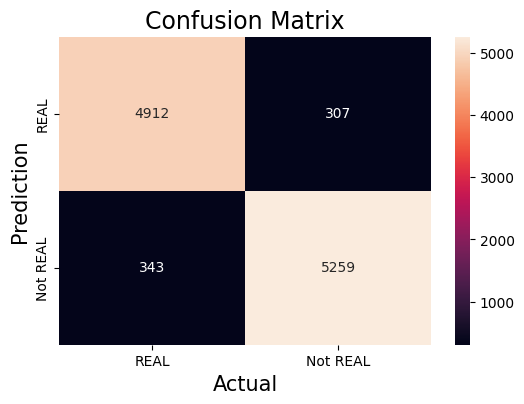

In [75]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['REAL','Not REAL'],
yticklabels=['REAL','Not REAL'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=17)
plt.show()




In [77]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
k =50
kf = StratifiedKFold(n_splits=k)   
mod = cross_val_score(model,X, y, scoring='accuracy', cv=kf)
print("accuracy:",np.max(mod)*100)  
p= cross_val_score(model,X, y, scoring='precision',cv=kf)
print("precision:",np.max(p)*100)
f1 = cross_val_score(model,X, y, scoring='f1',cv=kf)
print("f1_score:",np.max(f1)*100)
re= cross_val_score(model,X, y, scoring='recall',cv=kf)
print("Recall:",np.max(re)*100)

accuracy: 96.11650485436894
precision: 95.97855227882037
f1_score: 96.23655913978496
Recall: 97.30458221024259


In [78]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(sensitivity)
print(specificity)

0.9387718671902892
0.9411764705882353


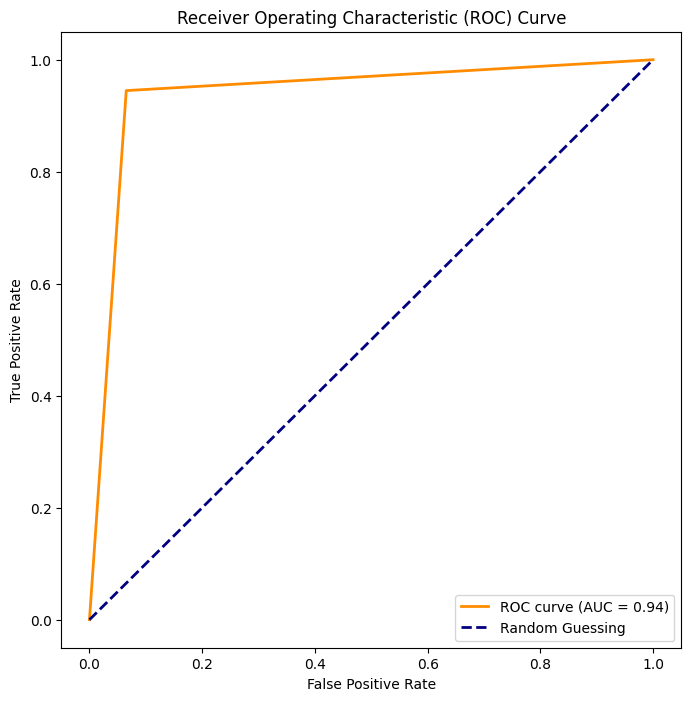

In [79]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()    

In [80]:
import pickle
pickle.dump(tfidf_vectorizer, open('vectorizers.pkl', 'wb'))

In [81]:
filename = 'MY_MODEL.pkl'
pickle.dump(model, open(filename, 'wb')) 